In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random

import sys
import os

import warnings
warnings.filterwarnings('ignore')


#Función para sacar outliers
#(se puede cambiar eso de s-s.mean <= etc, esa es una forma posible de detectar outliers)

def mascara_outliers(s, mult):
    return abs(s - s.mean()) <= mult*s.std()

def sacar_outliers(datos,tag,mult):
    mascara = mascara_outliers(datos[tag], mult)
    return datos[mascara]


#Función para delimitar ejes:
#(dice dominio, pero se puede usar para imagen también... ya se que esta medio cabeza, pero anda bien)

def mascara_dominio_abajo(s,x0):
    return x0 <= s
def mascara_dominio_arriba(s,x1):
    return s <= x1

def achicar_dominio(datos,tag,x0,x1):
    mascara = mascara_dominio_abajo(datos[tag],x0)
    datos = datos[mascara]
    mascara = mascara_dominio_arriba(datos[tag],x1)
    return datos[mascara]


#Función para crear una columna con cada año
#(es imrpotante haber cargado el csv con el arguemtno parse_dates=[tag])
def crear_col_años(datos,tag):
    return datos[tag].apply (lambda x : x.year if x.month <= 12 else x.year + 1)


#Graficadores

def graficador(data, tagX, tagY, title, labelX, labelY, interp, col, graf1, graf2):
    ax = sns.tsplot(data=data[tagY], time=data[tagX], interpolate=interp, color=col)
    ax.legend(labels=[graf1,graf2])
    sns.plt.title(title)
    sns.plt.xlabel(labelX)
    sns.plt.ylabel(labelY)

def graficador3(data, tagX, tagY, title, labelX, labelY, interp, col, graf1, graf2, graf3):
    ax = sns.tsplot(data=data[tagY], time=data[tagX], interpolate=interp, color=col)
    ax.legend(labels=[graf1,graf2,graf3])
    sns.plt.title(title)
    sns.plt.xlabel(labelX)
    sns.plt.ylabel(labelY)
    
def mostrar():
    sns.plt.show()
    sns.plt.close()


#Auxiliares

def descripcion(datos):
    print(datos.describe())

def ver_filas(datos, fil):
    print(datos.head(fil))

In [2]:
################################
# Levanto los datos, y los veo #
################################

df_todos = []
df_nombres = []
for filename in sorted(os.listdir('./ejercicio2')):
    primero = True
    if not('ipynb' in filename):
        df_nombres.append(filename)
        for res in os.listdir('./ejercicio2/'+str(filename)):
            df_actual = pd.read_csv('./ejercicio2/'+str(filename)+'/'+str(res))
            if primero:
                primero = False
                df_todos.append(df_actual)
            else:
                df_todos[-1]['prim'] = df_todos[-1]['prim'] + df_actual['prim']
                df_todos[-1]['master'] = df_todos[-1]['master'] + df_actual['master']

for i in range(0,len(df_todos)):
    df_todos[i]['prim'] = (df_todos[i]['prim'] / 250) #si se quiere reajustar la medida, hacerlo dentro de gráficos
    df_todos[i]['master'] = (df_todos[i]['master'] / 250)


0 primC_max
1 primC_med
2 primC_min
3 primO_max
4 primO_med
5 primO_min


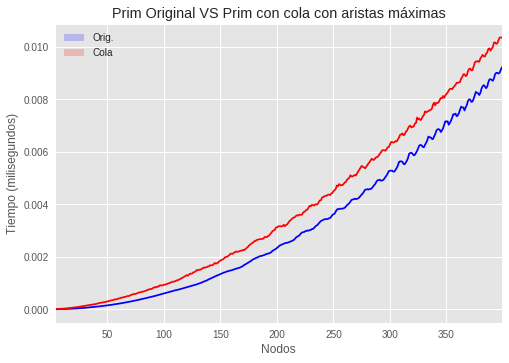

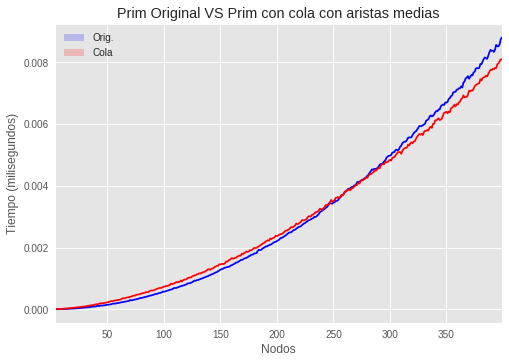

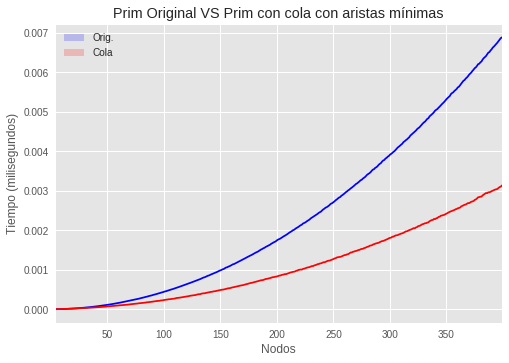

In [3]:

for i in range(0,len(df_nombres)):
    print(str(i) + ' ' + str(df_nombres[i]))
    
#####################
# Hago los gráficos #
#####################
#graficador(data, tagX, tagY, title, labelX, labelY, interp, col, graf1, graf2)


graficador(df_todos[3], 'nodos', 'prim', 'Prim Original VS Prim con cola con aristas máximas', 'Nodos', 'Tiempo (milisegundos)', True, 'b', 'Orig.', 'Cola')
graficador(df_todos[0], 'nodos', 'prim', 'Prim Original VS Prim con cola con aristas máximas', 'Nodos', 'Tiempo (milisegundos)', True, 'r', 'Orig.', 'Cola')
mostrar()

graficador(df_todos[4], 'nodos', 'prim', 'Prim Original VS Prim con cola con aristas medias', 'Nodos', 'Tiempo (milisegundos)', True, 'b', 'Orig.', 'Cola')
graficador(df_todos[1], 'nodos', 'prim', 'Prim Original VS Prim con cola con aristas medias', 'Nodos', 'Tiempo (milisegundos)', True, 'r', 'Orig.', 'Cola')
mostrar()

graficador(df_todos[5], 'nodos', 'prim', 'Prim Original VS Prim con cola con aristas mínimas', 'Nodos', 'Tiempo (milisegundos)', True, 'b', 'Orig.', 'Cola')
graficador(df_todos[2], 'nodos', 'prim', 'Prim Original VS Prim con cola con aristas mínimas', 'Nodos', 'Tiempo (milisegundos)', True, 'r', 'Orig.', 'Cola')
mostrar()

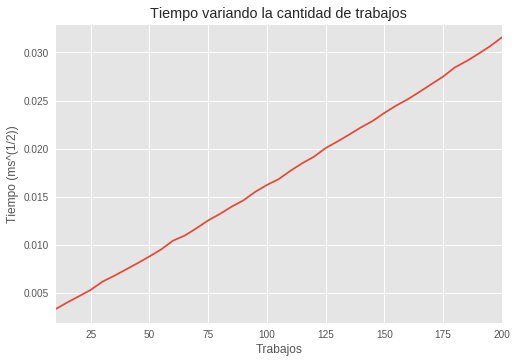

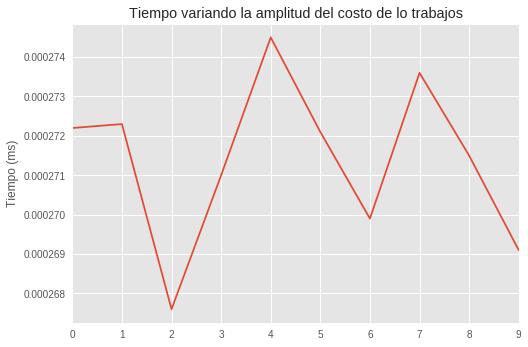

In [62]:
###############
# Ejercicio 1 #
###############

## Experimento 1 ##

df_variando_cant_trabajos = pd.read_csv('./ejercicio1/ej1_variando_cant_trabajos.csv')
plt.clf()
grafico_variando_cant_trabajos = df_variando_cant_trabajos.groupby('Trabajos').mean().apply(lambda Tiempo_s : Tiempo_s ** (1/2)).plot(y='Tiempo_s', legend=False)
grafico_variando_cant_trabajos.set_ylabel('Tiempo (ms^(1/2))')
grafico_variando_cant_trabajos.set_title('Tiempo variando la cantidad de trabajos')
mostrar()

## Experimento 2 ##

df_variando_amplitud = pd.read_csv('./ejercicio1/ej1_variando_amplitud_costos.csv')
amplitud_tiempo_promedio = []
amplitud_tiempo_promedio_2 = df_variando_amplitud['Tiempo_s']
ampltitudes = []

for filas in range(0, 100, 10):
    ampltitudes.append(100 - filas)
    amplitud_tiempo_promedio.append(amplitud_tiempo_promedio_2[filas:filas+10].mean())

d = {'Amplitud' : pd.Series(ampltitudes),
     'Tiempo_s' : pd.Series(amplitud_tiempo_promedio)}

df_variando_amplitud_res = pd.DataFrame(d)

plt.clf()
grafico_variando_cant_trabajos = df_variando_amplitud_res.plot(y='Tiempo_s', legend=False)
grafico_variando_cant_trabajos.set_ylabel('Tiempo (ms)')
grafico_variando_cant_trabajos.set_title('Tiempo variando la amplitud del costo de lo trabajos')
mostrar()